In [2]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [60]:
#Loading the data
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [61]:
df.head(4)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

#There are 32560 rows and 15 columns.
#Out of the 15 columns- 6 columns are of integer data type and 9 columns are of string data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
for i in df.columns:
    print("{} : {} \n".format(i,df[i].unique()))
    
    
#From the below results, it is clear that in Workclass and Occupation there are "?" values which are replaced by the mode
#of their respective columns

Age : [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Fnlwgt : [ 83311 215646 234721 ...  34066  84661 257302] 

Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Education_num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Marital_status : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Fa

In [16]:
#We can notice from the above results that there are "?" values in Workclass and Occupation and Native Country which is replaced by the mode of their 
#respective columns

a=df["Workclass"].mode()
b=df["Occupation"].mode()
c=df["Native_country"].mode()
print(a,b,c)

0     Private
Name: Workclass, dtype: object 0     Prof-specialty
Name: Occupation, dtype: object 0     United-States
Name: Native_country, dtype: object


In [17]:
df["Workclass"]=df["Workclass"].str.replace("?","Private")
df["Occupation"]=df["Occupation"].str.replace("?","Prof-specialty")
df["Native_country"]=df["Native_country"].str.replace("?","United-States")

# Graphical Analysis

In [7]:
#Analyzing Continuous Features
df_cont=df.select_dtypes(include=["int64"])

In [8]:
df_cont

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [9]:
c1=df_cont.columns.values

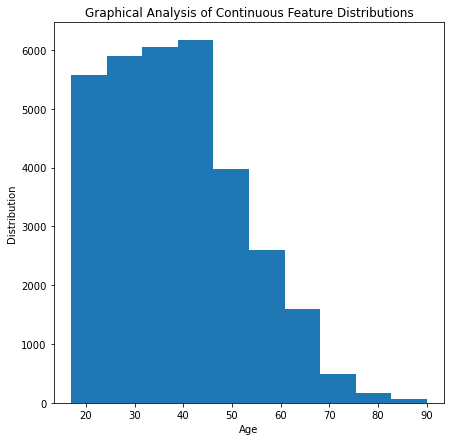

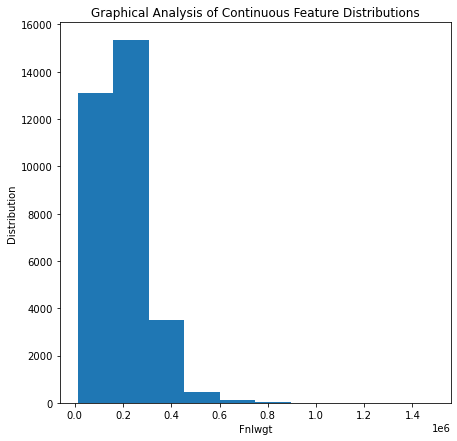

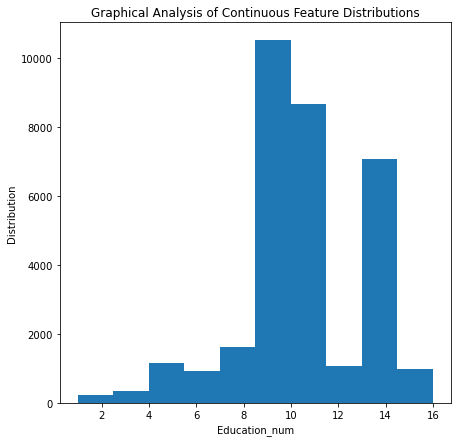

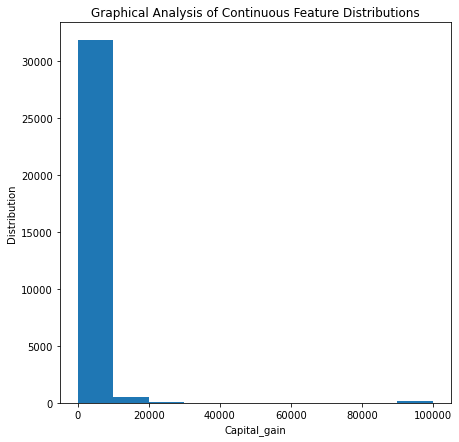

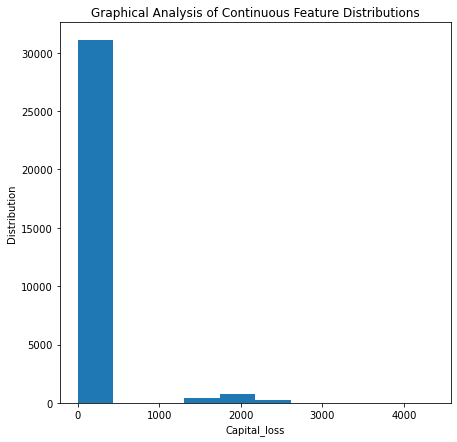

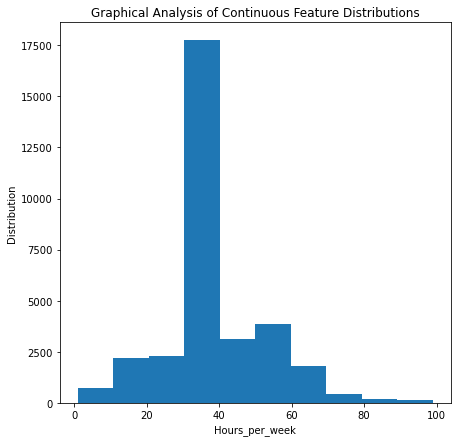

In [144]:
for i in c1:
    plt.figure(figsize=(7,7))
    plt.hist(df_cont[i])
    plt.xlabel(i)
    plt.ylabel("Distribution")
    plt.title("Graphical Analysis of Continuous Feature Distributions")
    plt.show()
    
#Age of the members in the census are from 16-90 though most of the members are in the age group- 16-50
#Fnlwgt is ranging from 0.01 to 0.3 for the majority, there are few members with fnlwgt from 0.3 to 0.8
#Many members are having number of education years between 8.5 to 11 and 13.5 to 14.5
#Capital gain is from 0- 10000 and few members have capital gain from 10000 to 30000
#Capital loss has a peak from 0-400 and a small distribution from 1300 to 2600
#Most of the members in the census work from 32 to 40 hours per week followed by 50-60 hours per week.

In [18]:
#Analyzing Categorical Features
df_cat=df.select_dtypes(include=["object"])

In [19]:
df_cat

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [13]:
col2=df_cat.columns.values

In [14]:
len(col2)

9

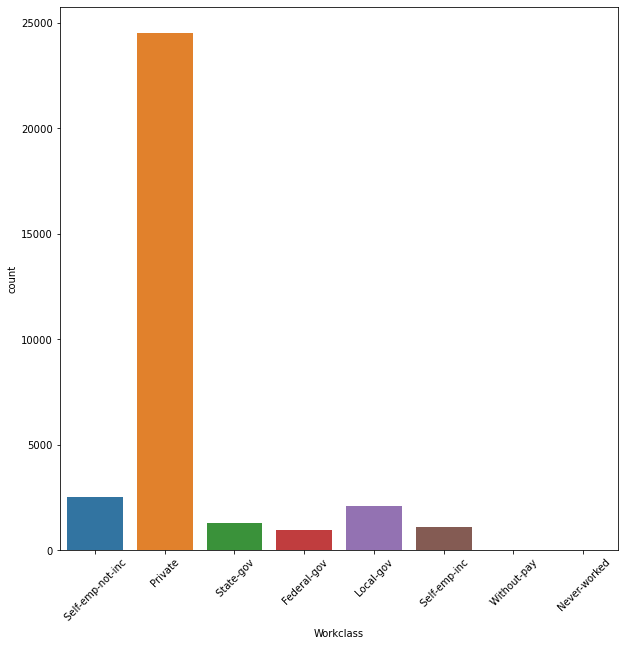

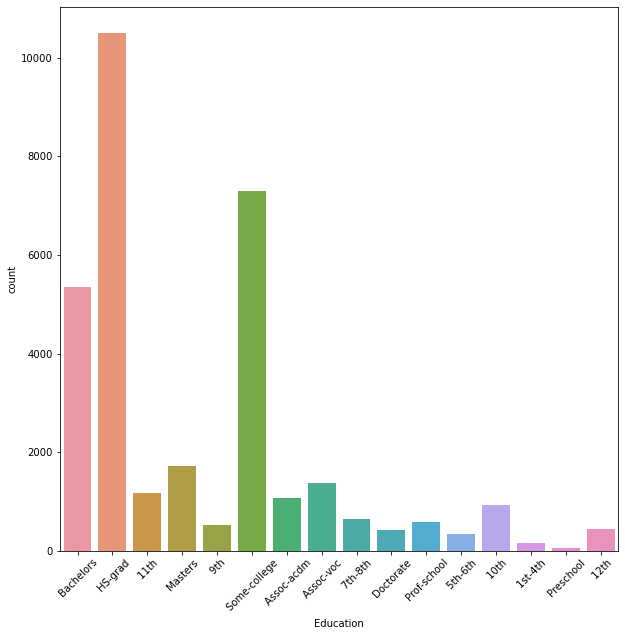

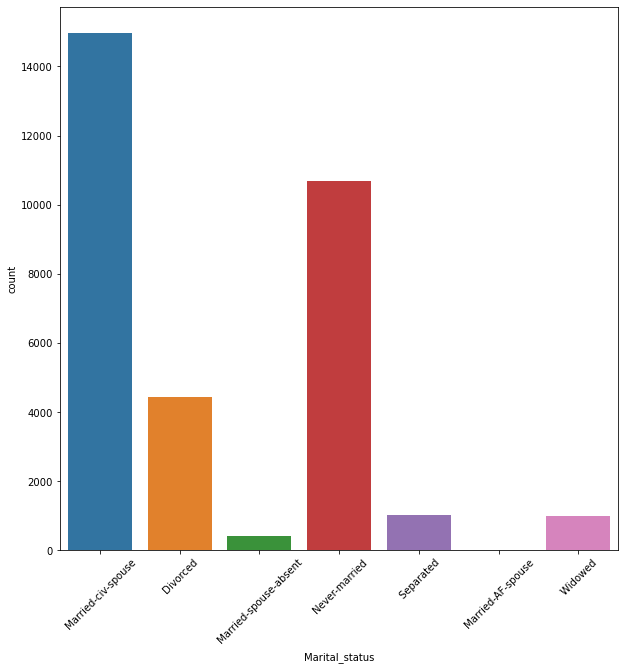

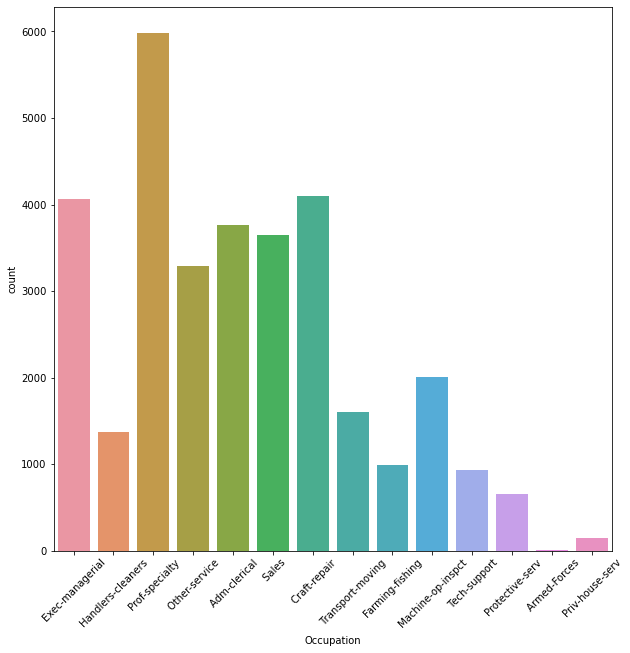

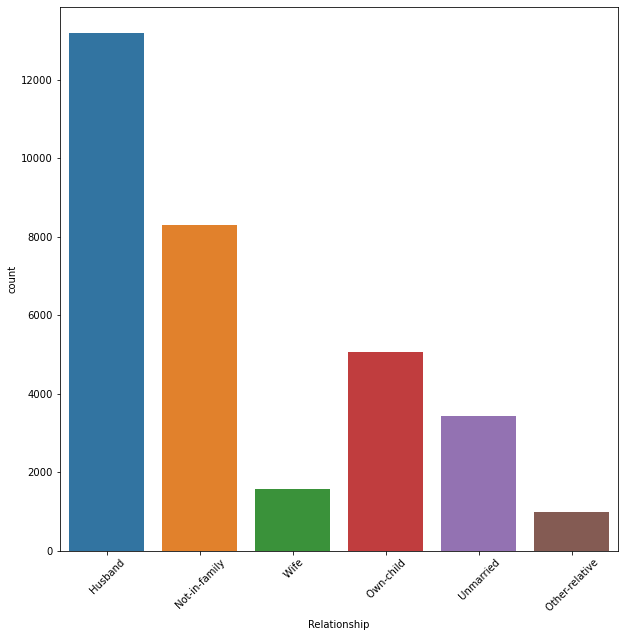

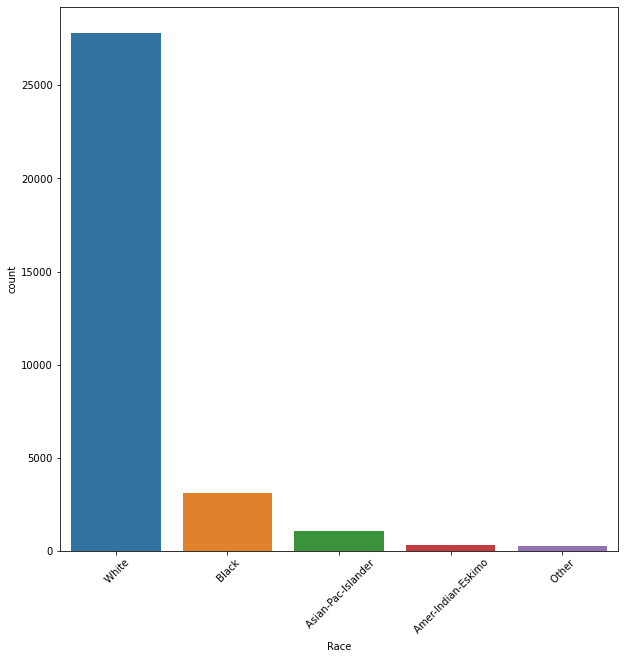

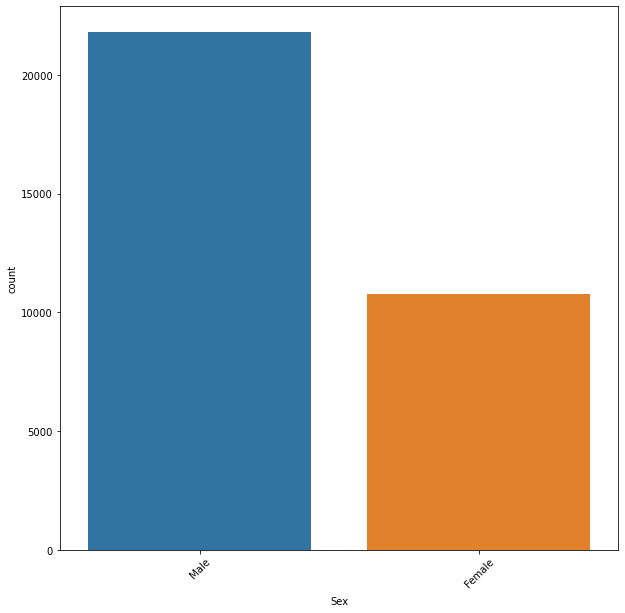

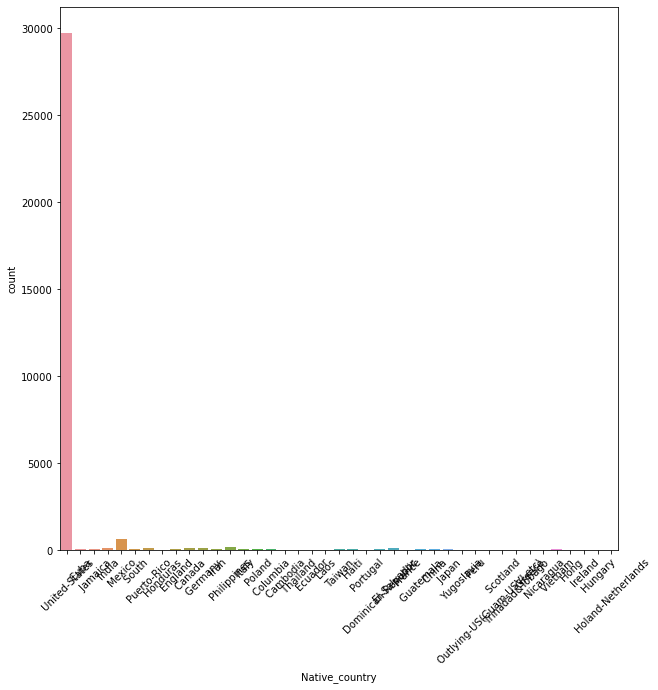

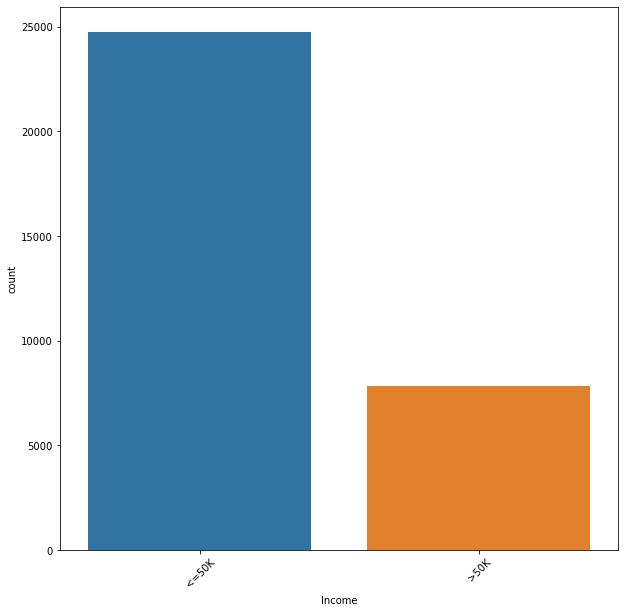

In [20]:
for i in col2:
    plt.figure(figsize=(10,10))
    sns.countplot(df_cat[i])
    plt.xlabel(i,fontsize=10)
    plt.xticks(rotation=45)
    plt.show()
    
#Majority of the members are working in private sector followed by self-employed, local-government.
#Most of the members have an educational qualification of High school grad followed by members graduating from some college
#and bachelors and masters.
#Majority of the members are married to civilian spouse, followed by people who are not married, divorced. Approximately 80 people
#are separated and widowed.
#When it comes to occupationg, members are majorly working in their profession-speciality followed by executive-managerial,craft-repair
#After craft repair, members are in Adm-clerical occupation followed by sales and other services.
#Most of the members are husband in relation, almost 8200 members are not-in-family , 5000 members are own-children in their family
#3500 members are not married, 1600 are wife in relation and 700 members are other-relatives.
#28000 members belong to white race followed by black race, Asian-Pac-Islander, Amer-Indian-Eskimo and others.
#Around 20500 are Male and 1300 are females.
#25900 members belong to United States and small group of members belong to Mexico
#Around 25800 members have an income less than or equal to 50k and around 7500 have income more than 50k

# Bivariate Analysis

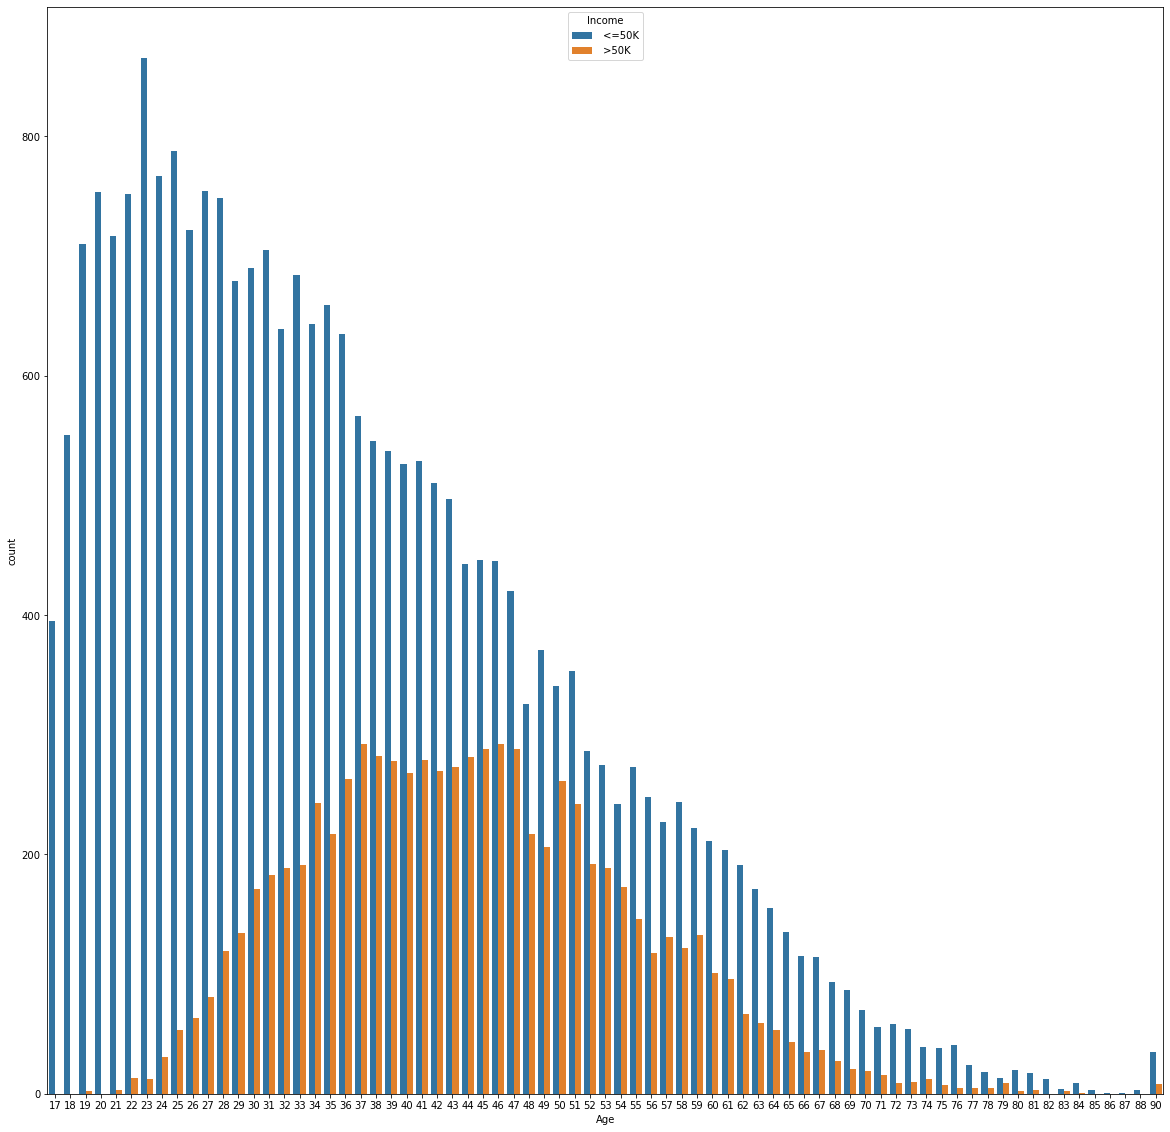

In [21]:
#Analysing Income Vs. Age
plt.figure(figsize=(20,20))
sns.countplot(df['Age'],hue=df['Income'])
plt.show()

#Large number of members of age-36-48 have income greater than 50k
#For lower age group and higher age group very few members have income more than 50k


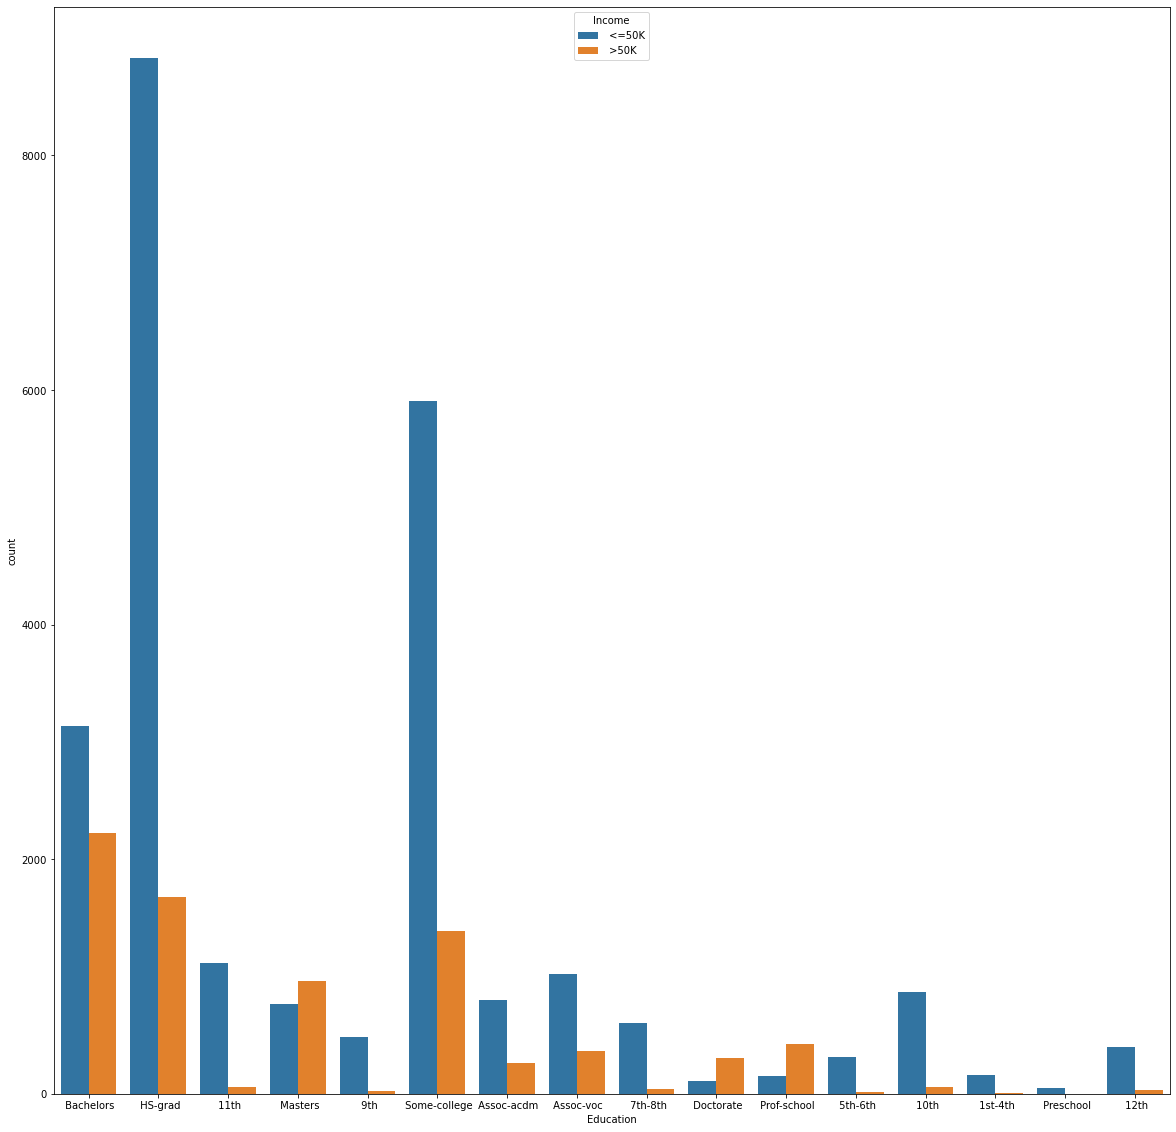

In [25]:
#Analysing Income Vs. Education
plt.figure(figsize=(20,20))
sns.countplot(df['Education'],hue=df['Income'])
plt.show()

#Bacheros are the largest group who earn more than 50k followed by High School graduates,college graduates and masters.
#High School graduates are the largest group who earn less than 50k followed by college-graduates and bachelors.

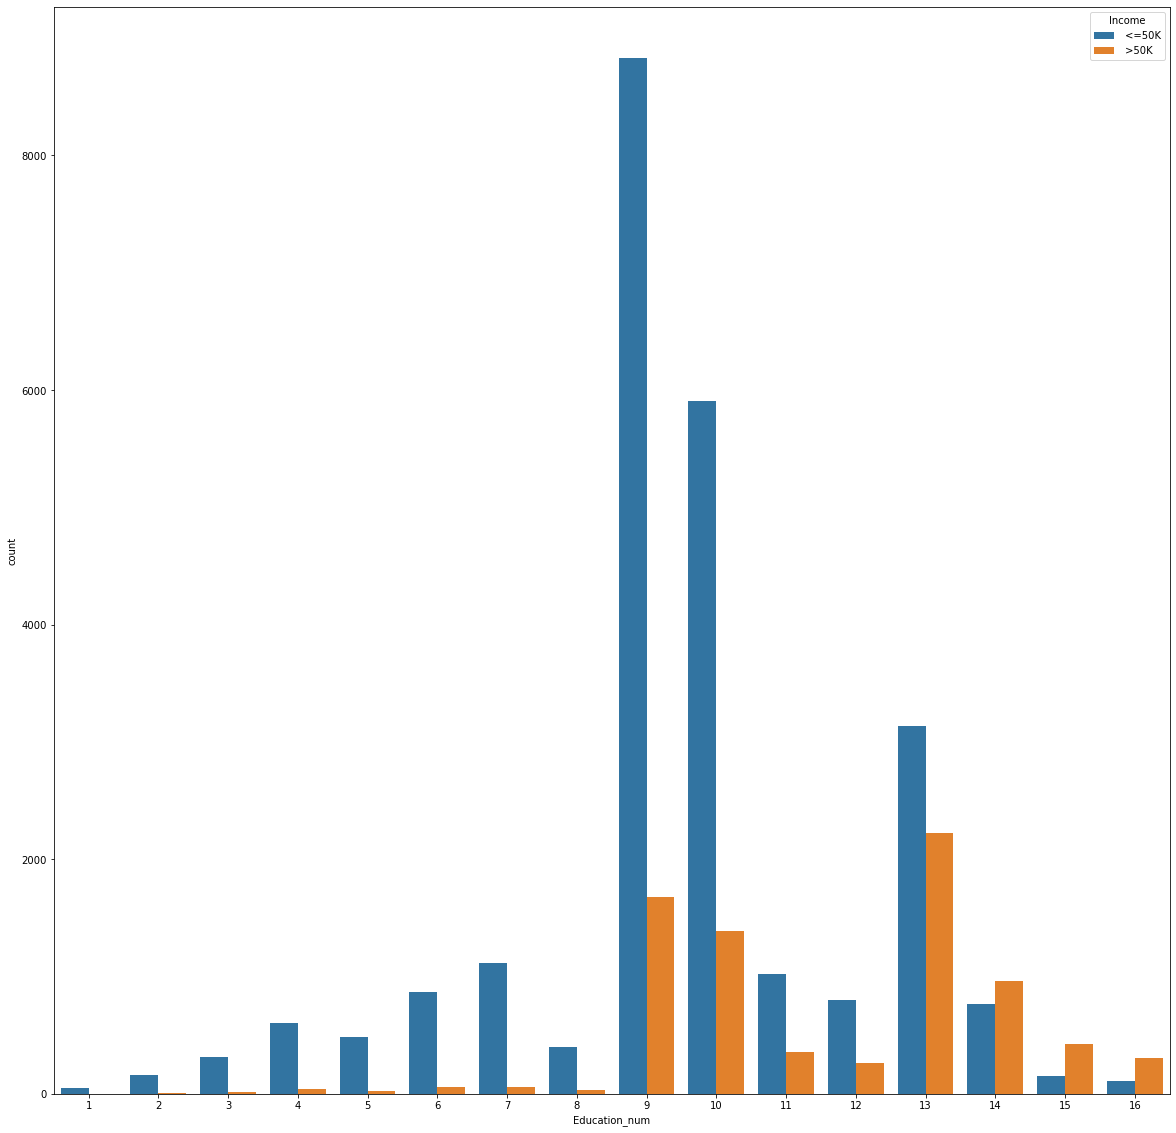

In [27]:
#Analysing Income Vs. Number of Years of Education
plt.figure(figsize=(20,20))
sns.countplot(df['Education_num'],hue=df['Income'])
plt.show()

#People with 13 education_num earn above 50k followed by 9,10 and 14
#People with 9 education_num are the highest number of ppl who earn less than 50k followed by 10,13 and 7

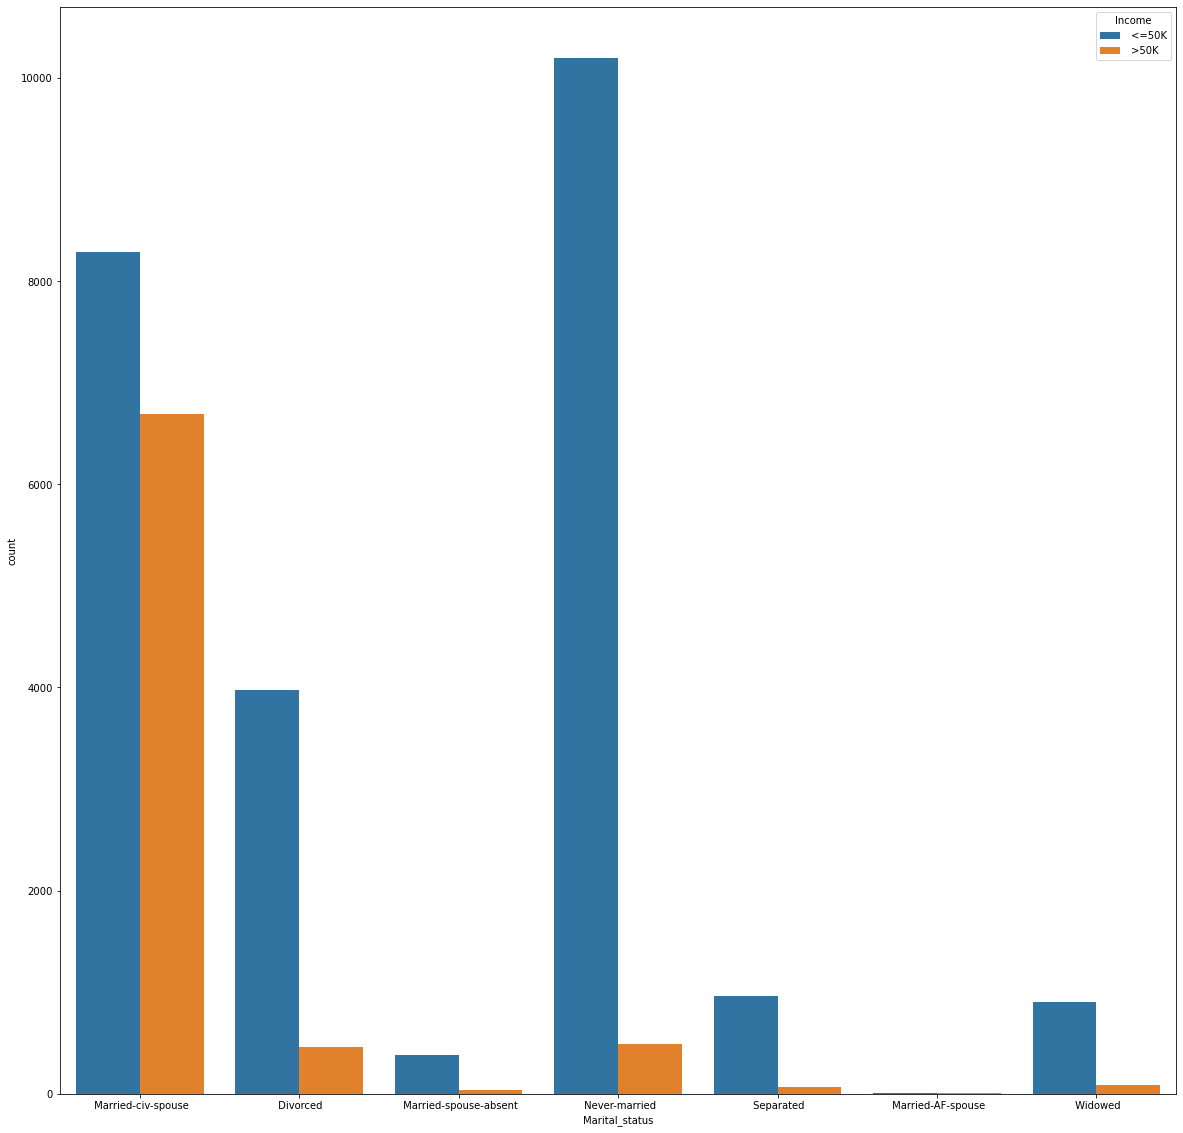

In [28]:
#Analysing Income Vs. Marital Status
plt.figure(figsize=(20,20))
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.show()

#Never-married people are the highest number of people who earn less than 50k followed by married with civillian spouse and divorced
#People who are married with civillian spouse are the highest number of people who earn greater than 50k.

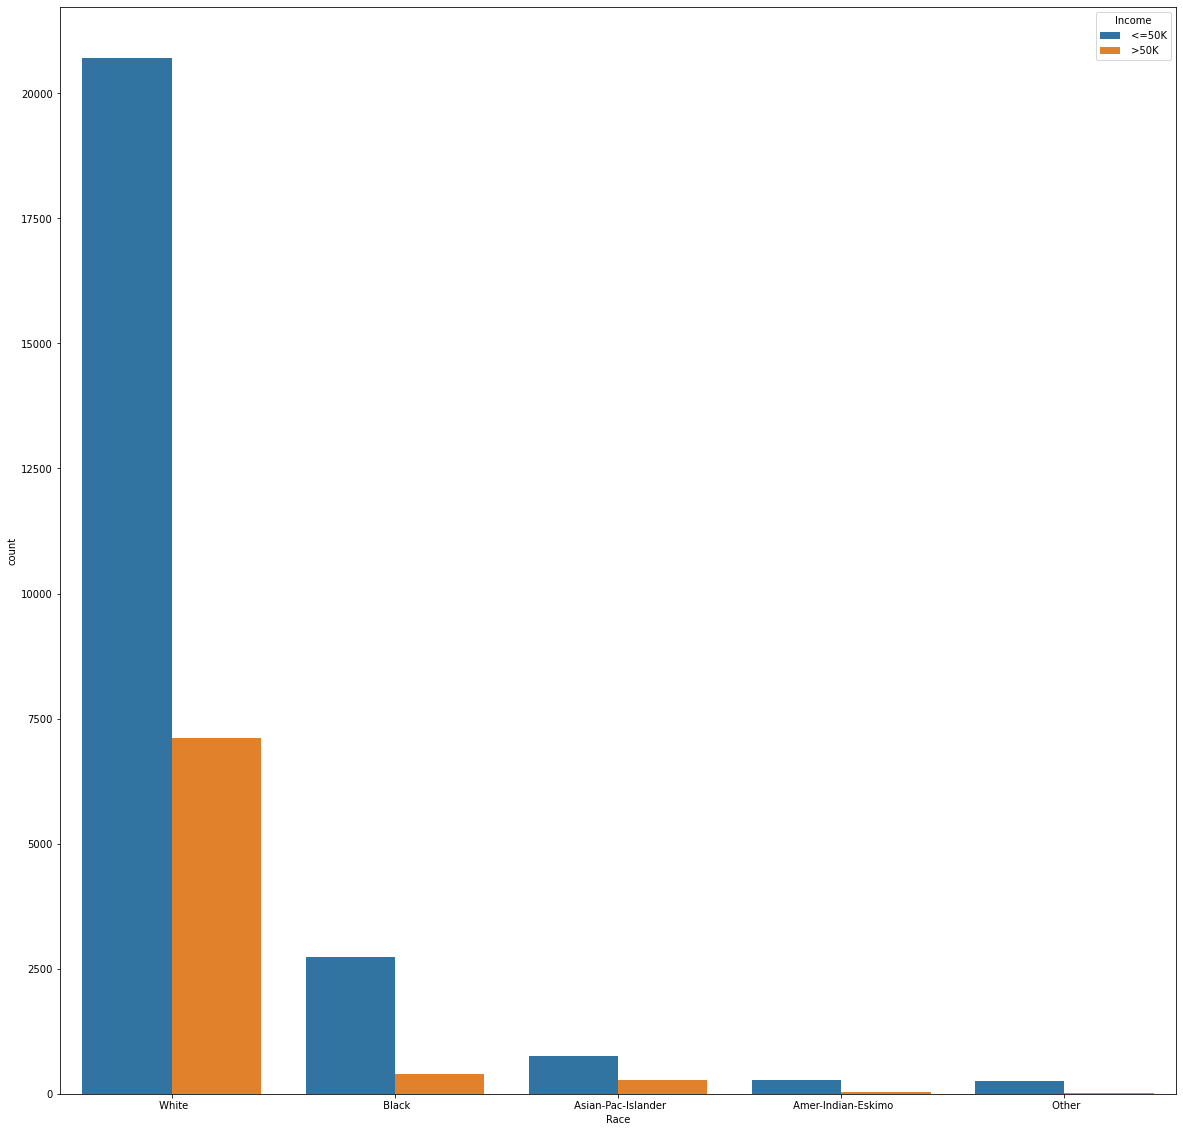

In [29]:
#Analysing Income Vs. Race
plt.figure(figsize=(20,20))
sns.countplot(df['Race'],hue=df['Income'])
plt.show()

#White people are thr highest number of people for both less than 50k and above 50k category followed by black,asian-pac islader

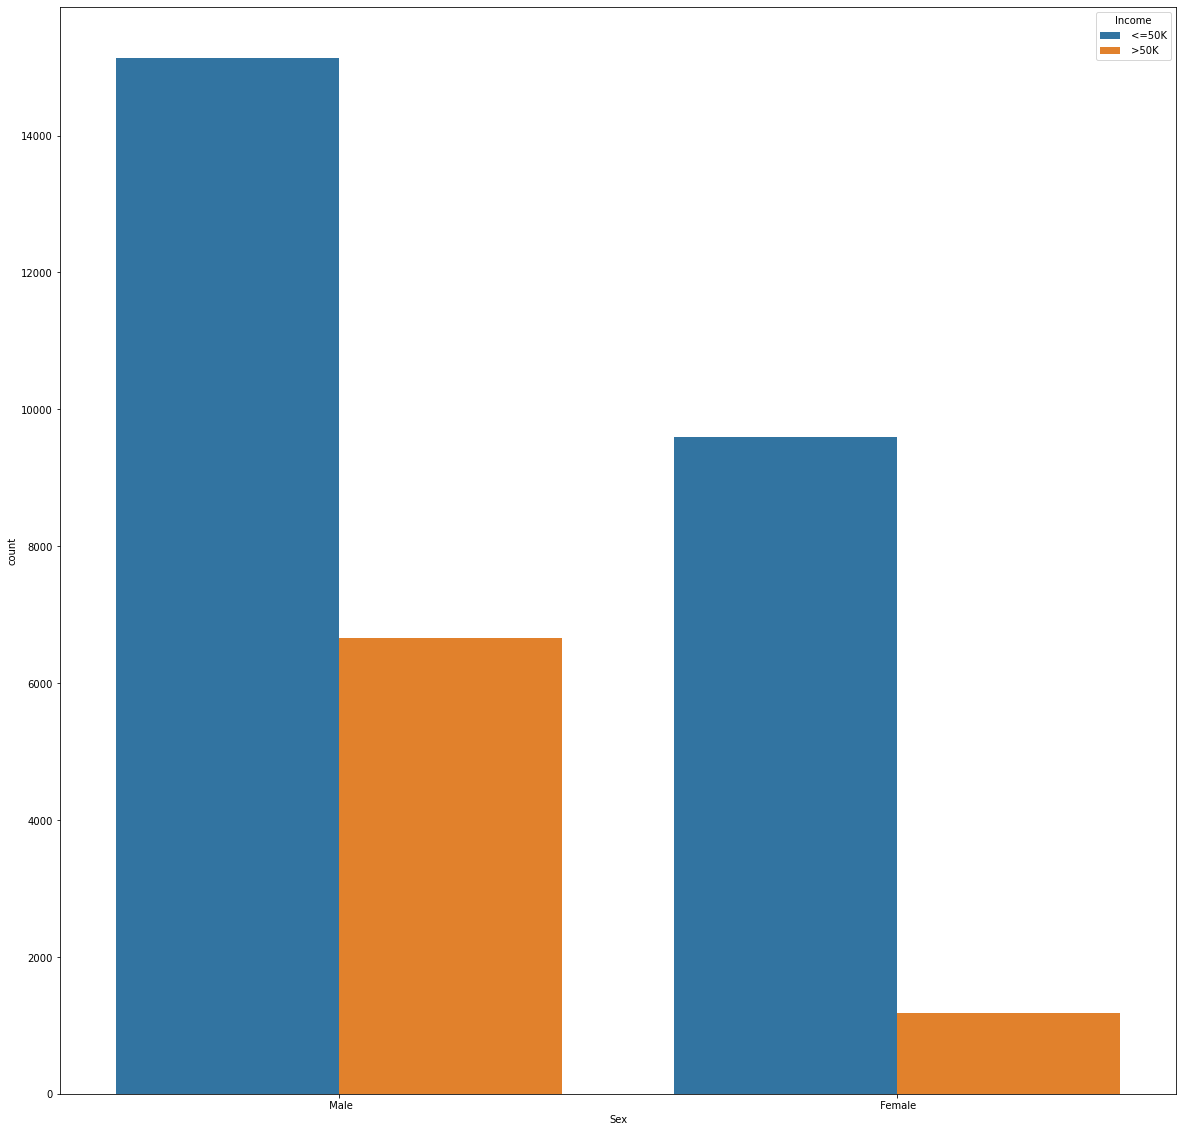

In [30]:
#Analysing Income Vs. Sex
plt.figure(figsize=(20,20))
sns.countplot(df['Sex'],hue=df['Income'])
plt.show()

#Male members are high in both less than 50k and above 50k category

# Correlation Between Features

In [63]:
#Encoding the Output to check for correlation

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
df["Income"]=le.fit_transform(df["Income"])

In [69]:
df["Income"].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

<AxesSubplot:>

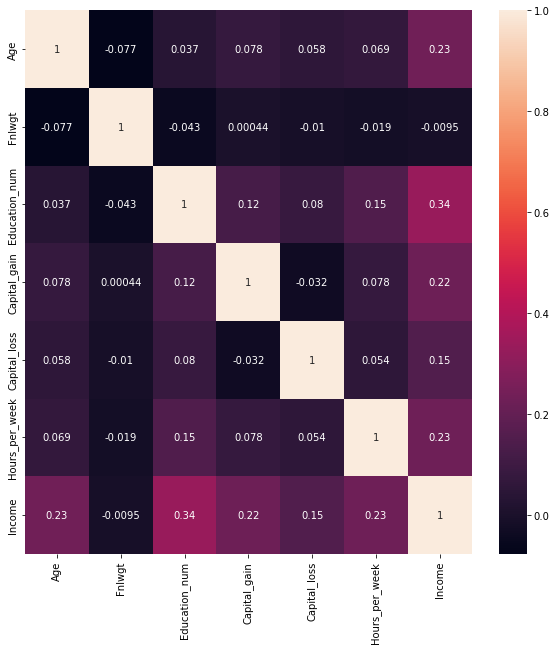

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

#From the below heatmap, we can conclude that Income is highly correlated with Age, Education_num, Capital_gain and Hours_per_week

# Encoding Categorical Features 

In [46]:
cat=[i for i in df.columns if df[i].dtypes=="object"]

In [71]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in cat:
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [72]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


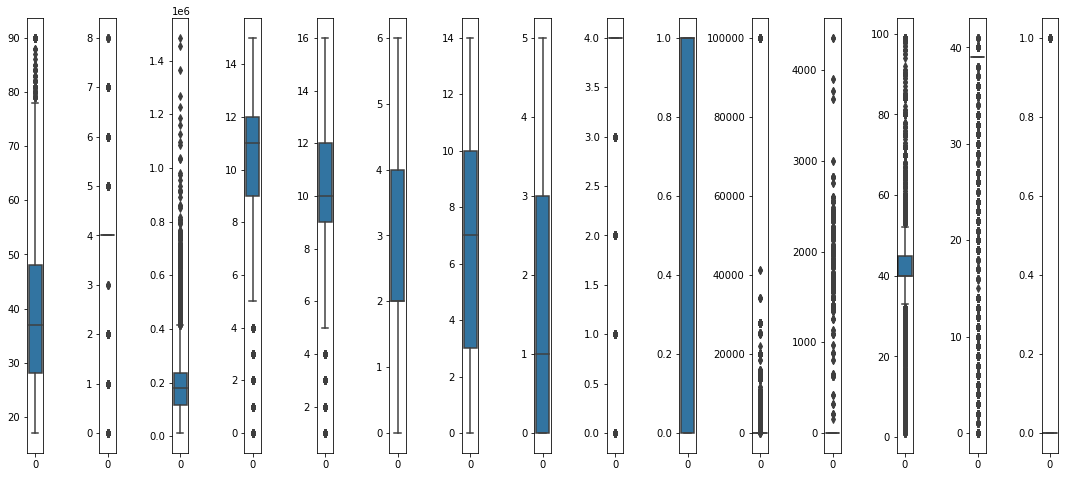

In [73]:
#Plotting a box plot to check the outliers

columnlist=df.columns.values

ncol=30
nrows=14

#Plotting box plots for the features-Length,Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight
plt.figure(figsize=(ncol, 3*ncol))
for i in range(0, len(columnlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[columnlist[i]])
    plt.tight_layout()
    
# We can observe from the box plots that there are many values beyond the range which may or may not be an outliers
# whcih have to be catered using the z-score

In [74]:
#Checking Z-Score for Outliers
from scipy import stats

z1=abs(stats.zscore(df[columnlist]))

In [75]:
x=np.where(z1>3)
x

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

# Removing the Outliers

In [76]:
df_z=df[(z1 < 3).all(axis=1)]

In [77]:
print(df.shape,df_z.shape)

(32560, 15) (27417, 15)


In [88]:
#Percentage data loss

dl=(df.shape[0]-df_z.shape[0])/(df.shape[0])
print(round((dl*100),2))

15.8


In [20]:
df_z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,39.0,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,39.0,0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,39.0,0


# Balancing the Target Variable

In [94]:
df_z["Income"].value_counts()

0    21279
1     6138
Name: Income, dtype: int64

In [95]:
from sklearn.utils import resample
dfminor_output=df_z[(df_z["Income"]==1)]
dfmajor_output=df_z[(df_z["Income"]==0)]
dfmin_up=resample(dfminor_output,replace=True,n_samples=21279,random_state=42)
df_up=pd.concat([dfmin_up,dfmajor_output])

In [96]:
df_up["Income"].value_counts()

1    21279
0    21279
Name: Income, dtype: int64

# Feature Scaling 

In [97]:
X=df_up.drop("Income",axis=1)
Y=df_up[["Income"]]

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=4,test_size=0.33)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [99]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
feature_imp=rf.feature_importances_

In [101]:
len(feature_imp)

14

In [102]:
for index, val in enumerate(feature_imp):
    print(index,round((val * 100), 2))

0 18.53
1 3.67
2 16.09
3 3.85
4 8.2
5 10.78
6 6.66
7 13.13
8 0.83
9 1.6
10 7.63
11 0.03
12 8.31
13 0.7


In [103]:
X.columns.values

array(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype=object)

From the above results of feature importance, features- Workclass,Education,Race,Sex, Capital_loss and Native_country have very less feature importances, hence removing the same

In [104]:
X_new=X.drop(["Workclass","Education","Race","Sex","Capital_loss","Native_country"],axis=1)

In [105]:
#Scaling the features using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=scaler.fit_transform(X_new)

X_s=pd.DataFrame(x,columns=X_new.columns)

In [106]:
#Applying power transform
from sklearn.preprocessing import power_transform
Xt=power_transform(X_s)

# Training Multiple Models

In [107]:
#Splitting data into Training and Testing Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [108]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()
xgb = XGBClassifier()

lst=[lr,rf,kn,sv,dt,gb,xgb]

In [109]:
for i1 in lst:
    for i2 in range(0,4):
        x_train,x_test,y_train,y_test=train_test_split(Xt,Y,random_state=i2,test_size=0.25)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        print("Model",i1,"Random State-",i2,"Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train,average='weighted'),2),"F1 score -test",round(f1_score(y_test,pred_test,average='weighted'),2))

Model LogisticRegression() Random State- 0 Accuracy Score-Test 0.77 Accuracy Score-Train 0.78 F1 score-train 0.78 F1 score -test 0.77
Model LogisticRegression() Random State- 1 Accuracy Score-Test 0.78 Accuracy Score-Train 0.78 F1 score-train 0.78 F1 score -test 0.78
Model LogisticRegression() Random State- 2 Accuracy Score-Test 0.78 Accuracy Score-Train 0.78 F1 score-train 0.78 F1 score -test 0.78
Model LogisticRegression() Random State- 3 Accuracy Score-Test 0.78 Accuracy Score-Train 0.78 F1 score-train 0.78 F1 score -test 0.78
Model RandomForestClassifier() Random State- 0 Accuracy Score-Test 0.93 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.93
Model RandomForestClassifier() Random State- 1 Accuracy Score-Test 0.93 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.93
Model RandomForestClassifier() Random State- 2 Accuracy Score-Test 0.92 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.92
Model RandomForestClassifier() Random State- 3 Accuracy 

In [111]:
x_train,x_test,y_train,y_test=train_test_split(Xt,Y,random_state=3,test_size=0.25)

# Logistic Regression

In [112]:
m1=lr.fit(x_train,y_train)
pred_train=m1.predict(x_train)
pred_test=m1.predict(x_test)

In [113]:
print(round(accuracy_score(y_train,pred_train),2)*100)

78.0


In [114]:
print(round(accuracy_score(y_test,pred_test),2)*100)

78.0


In [115]:
print(round(f1_score(y_train,pred_train,average='weighted'),2)*100)

78.0


In [116]:
print(round(f1_score(y_test,pred_test,average='weighted'),2)*100)

78.0


In [117]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      5338
           1       0.77      0.80      0.78      5302

    accuracy                           0.78     10640
   macro avg       0.78      0.78      0.78     10640
weighted avg       0.78      0.78      0.78     10640



In [118]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [119]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)

In [120]:
cv1=cross_val_score(m1,Xt,Y, scoring='accuracy', cv=cv)

In [121]:
print(round(cv1.mean(),2)*100)

78.0


# Random Forest Classifier

In [408]:
m2=rf.fit(x_train,y_train)
pred_train=m2.predict(x_train)
pred_test=m2.predict(x_test)

In [409]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [410]:
print(round(accuracy_score(y_test,pred_test),2)*100)

93.0


In [125]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [126]:
print(round(f1_score(y_test,pred_test,average='weighted'),2)*100)

93.0


In [127]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5338
           1       0.89      0.98      0.93      5302

    accuracy                           0.93     10640
   macro avg       0.93      0.93      0.93     10640
weighted avg       0.93      0.93      0.93     10640



In [131]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m2,Xt,Y, scoring='accuracy', cv=cv)

In [132]:
print(round(cv1.mean(),2)*100)

94.0


In [411]:
print(round(roc_auc_score(y_test,pred_test),2)*100)

93.0


In [412]:
print(confusion_matrix(y_test,pred_test))

[[4691  647]
 [ 118 5184]]


# KNeighbors Classifier

In [133]:
m3=kn.fit(x_train,y_train)
pred_train=m3.predict(x_train)
pred_test=m3.predict(x_test)

In [134]:
print(round(accuracy_score(y_train,pred_train),2)*100)

92.0


In [135]:
print(round(accuracy_score(y_test,pred_test),2)*100)

86.0


In [136]:
print(round(f1_score(y_train,pred_train),2)*100)

93.0


In [137]:
print(round(f1_score(y_test,pred_test),2)*100)

87.0


In [138]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      5338
           1       0.82      0.94      0.87      5302

    accuracy                           0.86     10640
   macro avg       0.87      0.86      0.86     10640
weighted avg       0.87      0.86      0.86     10640



In [139]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m3,Xt,Y, scoring='accuracy', cv=cv)


In [140]:
print(round(cv1.mean(),2)*100)

87.0


# SVC

In [141]:
m4=sv.fit(x_train,y_train)
pred_train=m4.predict(x_train)
pred_test=m4.predict(x_test)

In [142]:
print(round(accuracy_score(y_train,pred_train),2)*100)

82.0


In [143]:
print(round(accuracy_score(y_test,pred_test),2)*100)

82.0


In [144]:
print(round(f1_score(y_train,pred_train),2)*100)

83.0


In [145]:
print(round(f1_score(y_test,pred_test),2)*100)

83.0


In [146]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      5338
           1       0.78      0.89      0.83      5302

    accuracy                           0.82     10640
   macro avg       0.83      0.82      0.82     10640
weighted avg       0.83      0.82      0.82     10640



In [148]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m4,Xt,Y, scoring='accuracy', cv=cv)

In [149]:
print(round(cv1.mean(),2)*100)

82.0


# Decision Tree Classifier

In [150]:
m5=dt.fit(x_train,y_train)
pred_train=m5.predict(x_train)
pred_test=m5.predict(x_test)

In [151]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [152]:
print(round(accuracy_score(y_test,pred_test),2)*100)

92.0


In [153]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [154]:
print(round(f1_score(y_test,pred_test),2)*100)

92.0


In [155]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      5338
           1       0.88      0.97      0.92      5302

    accuracy                           0.92     10640
   macro avg       0.92      0.92      0.92     10640
weighted avg       0.92      0.92      0.92     10640



In [156]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m5,Xt,Y, scoring='accuracy', cv=cv)

In [157]:
print(round(cv1.mean(),2)*100)

93.0


# Gaussian NB

In [158]:
m6=gb.fit(x_train,y_train)
pred_train=m6.predict(x_train)
pred_test=m4.predict(x_test)

In [159]:
print(round(accuracy_score(y_train,pred_train),2)*100)

78.0


In [160]:
print(round(accuracy_score(y_test,pred_test),2)*100)

82.0


In [161]:
print(round(f1_score(y_train,pred_train),2)*100)

78.0


In [162]:
print(round(f1_score(y_test,pred_test),2)*100)

83.0


In [163]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      5338
           1       0.78      0.89      0.83      5302

    accuracy                           0.82     10640
   macro avg       0.83      0.82      0.82     10640
weighted avg       0.83      0.82      0.82     10640



In [164]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m6,Xt,Y, scoring='accuracy', cv=cv)

In [165]:
print(round(cv1.mean(),2)*100)

78.0


# XGB Classifier

In [166]:
m7=xgb.fit(x_train,y_train)
pred_train=m7.predict(x_train)
pred_test=m7.predict(x_test)

In [167]:
print(round(accuracy_score(y_train,pred_train),2)*100)

90.0


In [168]:
print(round(accuracy_score(y_test,pred_test),2)*100)

87.0


In [169]:
print(round(f1_score(y_train,pred_train),2)*100)

90.0


In [170]:
print(round(f1_score(y_test,pred_test),2)*100)

88.0


In [171]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      5338
           1       0.85      0.92      0.88      5302

    accuracy                           0.87     10640
   macro avg       0.88      0.88      0.87     10640
weighted avg       0.88      0.87      0.87     10640



In [172]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m7,Xt,Y, scoring='accuracy', cv=cv)

In [173]:
print(round(cv1.mean(),2)*100)

87.0


#### From the above results, Random Forest Classifier model with random state-3 and test_size=0.25 is an effective model which has a Accuracy Score for training data-1 and Accuracy Score for testing data-0.93 and F1 score-0.93

# Hyperparameter Tuning

In [314]:
rf=RandomForestClassifier(n_estimators=50)

In [315]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [316]:
from sklearn.model_selection import RandomizedSearchCV

In [362]:
param_dist={"max_depth": [30,40,50,60,70,80],
            "criterion": ["gini", "entropy","log_loss"],
            'ccp_alpha': [0.0,0.1,0.2],
            "n_jobs":[1,2],
             "max_leaf_nodes":[1,2,None]}

In [363]:
samples=7 # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=3)

In [364]:
final=randomCV.fit(x_train,y_train)

In [365]:
print(final.best_params_)

{'n_jobs': 1, 'max_leaf_nodes': None, 'max_depth': 70, 'criterion': 'entropy', 'ccp_alpha': 0.0}


In [393]:
pred1=final.predict(x_test)


In [367]:
pred2=final.predict(x_train)

In [368]:
print(round(accuracy_score(y_test,pred1),2))

0.93


In [369]:
print(round(accuracy_score(y_train,pred2),2))

1.0


In [370]:
print(round(f1_score(y_train,pred2),2))

1.0


In [371]:
print(round(f1_score(y_test,pred1),2))

0.93


In [372]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5338
           1       0.89      0.98      0.93      5302

    accuracy                           0.93     10640
   macro avg       0.93      0.93      0.93     10640
weighted avg       0.93      0.93      0.93     10640



In [385]:
print(confusion_matrix(y_test,pred1))

[[4699  639]
 [ 117 5185]]


In [386]:
print(round(roc_auc_score(y_test,pred1),2)*100)

93.0


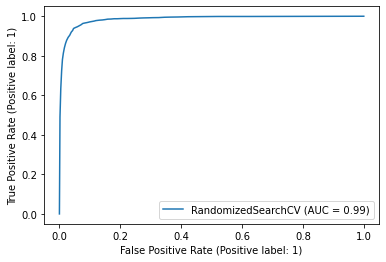

In [387]:
from sklearn import metrics
metrics.plot_roc_curve(final,x_test,y_test)
plt.show()

# Saving the Model

In [388]:
import pickle
pickle.dump(final, open('Census_classification', 'wb'))

In [407]:
pickled_model=pickle.load(open('Census_classification', 'rb'))
a=pickled_model.predict(x_test)

# Results

From the above results, the Random Forest Model before hyperparameter tuning  had a confusion matrix of
[[4691  647]
 [ 118 5184]]

After hyperparameter tuning, the confusion matrix is 

[[4699  639]
 [ 117 5185]]
 
We can conclude that after hyperparamter tuning, the False positive has reduced from 647 to 639 and False negative has reduced from 118 to 117 and having an accuracy score of 93% on test data and 100% on training data, which implies the difference between the 2 are not much compared to other models. F1 score and ROC_AUC score both are 93%.